<a href="https://colab.research.google.com/github/Inerix/gnn_covid19_spread/blob/master/create_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import datetime as dt

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/STAT430_Final_Project/')
!ls

df_orig = pd.read_csv('/content/drive/My Drive/STAT430_Final_Project/covid_19_data.csv')
df = df_orig.drop(['SNo', 'Last Update'],axis = 1)
df = df.fillna('-1')
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])
feature_vectors = pd.DataFrame()
feature_vectors['ObservationDate'] = df['ObservationDate'].unique()

covid_19_data.csv		    time_series_covid_19_confirmed_US.csv
COVID19_line_list_data.csv	    time_series_covid_19_deaths.csv
COVID19_open_line_list.csv	    time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv  time_series_covid_19_recovered.csv


In [0]:
df_orig.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
nodes = np.array(df.groupby(['Province/State','Country/Region']).size().reset_index().rename(columns={0:'count'}))
nodes = nodes[:,0:2]
print(nodes)

df_sorted = df.sort_values(by=['Country/Region','Province/State', 'ObservationDate']).reset_index(drop=True)

# Location column: colon-separated state and country
df_sorted["Location"] = df_sorted.apply(lambda row: row["Province/State"] + ":" + row["Country/Region"], axis=1) 
display(df_sorted)


[[' Montreal, QC' 'Canada']
 [' Norfolk County, MA' 'US']
 ['-1' ' Azerbaijan']
 ...
 ['Yukon' 'Canada']
 ['Yunnan' 'Mainland China']
 ['Zhejiang' 'Mainland China']]


,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Location
0,2020-02-28,-1,Azerbaijan,1.0,0.0,0.0,-1: Azerbaijan
1,2020-03-10,-1,"('St. Martin',)",2.0,0.0,0.0,"-1:('St. Martin',)"
2,2020-02-24,-1,Afghanistan,1.0,0.0,0.0,-1:Afghanistan
3,2020-02-25,-1,Afghanistan,1.0,0.0,0.0,-1:Afghanistan
4,2020-02-26,-1,Afghanistan,1.0,0.0,0.0,-1:Afghanistan
...,...,...,...,...,...,...,...
20569,2020-03-12,-1,occupied Palestinian territory,0.0,0.0,0.0,-1:occupied Palestinian territory
20570,2020-03-14,-1,occupied Palestinian territory,0.0,0.0,0.0,-1:occupied Palestinian territory
20571,2020-03-15,-1,occupied Palestinian territory,0.0,0.0,0.0,-1:occupied Palestinian territory
20572,2020-03-16,-1,occupied Palestinian territory,0.0,0.0,0.0,-1:occupied Palestinian territory


In [0]:
C = nx.Graph()
# All canadian + us border connections
# State and country colon-separated
C.add_edges_from([("Quebec:Canada", "Montreal, QC:Canada"),
                  ("Quebec:Canada", "Ontario:Canada"),
                  ("Quebec:Canada", "Newfoundland and Labrador:Canada"),
                  ("Quebec:Canada", "New Brunswick:Canada"),
                  ("Quebec:Canada", "Maine:US"),
                  ("Quebec:Canada", "Vermont:US"),
                  ("Quebec:Canada", "New York:US"),
                  ("New Brunswick:Canada", "Nova Scotia:Canada"),
                  ("New Brunswick:Canada", "Maine:US"),
                  ("Prince Edward Island:Canada", "Nova Scotia:Canada"),
                  ("Prince Edward Island:Canada", "New Brunswick:Canada"),
                  ("Manitoba:Canada", "Michigan:US"),
                  ("Manitoba:Canada", "North Dakota:US"),
                  ("Saskatchewan:Canada", "Manitoba:Canada"),
                  ("Saskatchewan:Canada", "Alberta:Canada"),
                  ("Saskatchewan:Canada", "Northwest Territories:Canada"),
                  ("Saskatchewan:Canada", "Montana:US"),
                  ("Saskatchewan:Canada", "North Dakota:US"),
                  ("Ontario:Canada", "Toronto, ON:Canada"),
                  ("Ontario:Canada", "London, ON:Canada"),
                  ("Ontario:Canada", "Manitoba:Canada"),
                  ("Ontario:Canada", "New York:US"),
                  ("Ontario:Canada", "Michigan:US"),
                  ("Ontario:Canada", "Minnesota:US"),
                  ("Alberta:Canada", "Montana:US"),
                  ("Alberta:Canada", "British Columbia:Canada"),
                  ("Alberta:Canada", "Northwest Territories:Canada"),
                  ("Alberta:Canada", "Calgary, Alberta:Canada"),
                  ("Alberta:Canada", "Edmonton, Alberta:Canada"),
                  ("British Columbia:Canada", "Washington:US"),
                  ("British Columbia:Canada", "Montana:US"),
                  ("British Columbia:Canada", "Idaho:US"),
                  ("British Columbia:Canada", "Yukon:Canada"),
                  ("British Columbia:Canada", "Alaska:US"),
                  ("British Columbia:Canada", "Northwest Territories:Canada"),
                  ("Northwest Territories:Canada", "Yukon:Canada"),
                  ("Yukon:Canada", "Alaska:US"),
                  ("Washington:US", "Idaho:US"),
                  ("Washington:US", "Oregon:US"),
                  ("Oregon:US", "California:US"),
                  ("Oregon:US", "Idaho:US"),
                  ("Oregon:US", "Nevada:US"),
                  ("California:US", "Nevada:US"),
                  ("California:US", "Arizona:US"),
                  ("Nevada:US", "Idaho:US"),
                  ("Nevada:US", "Utah:US"),
                  ("Nevada:US", "Arizona:US"),
                  ("Idaho:US", "Montana:US"),
                  ("Idaho:US", "Utah:US"),
                  ("Idaho:US", "Wyoming:US"),
                  ("Utah:US", "Arizona:US"),
                  ("Utah:US", "Colorado:US"),
                  ("Utah:US", "Wyoming:US"),
                  ("Arizona:US", "New Mexico:US"),
                  ("Montana:US", "North Dakota:US"),
                  ("Montana:US", "South Dakota:US"),
                  ("Montana:US", "Wyoming:US"),
                  ("Wyoming:US", "South Dakota:US"),
                  ("Wyoming:US", "Nebraska:US"),
                  ("Wyoming:US", "Colorado:US"),
                  ("Colorado:US", "Nebraska:US"),
                  ("Colorado:US", "Kansas:US"),
                  ("Colorado:US", "Oklahoma:US"),
                  ("Colorado:US", "New Mexico:US"),
                  ("New Mexico:US", "Oklahoma:US"),
                  ("New Mexico:US", "Texas:US"),
                  ("North Dakota:US", "Minnesota:US"),
                  ("North Dakota:US", "South Dakota:US"),
                  ("South Dakota:US", "Minnesota:US"),
                  ("South Dakota:US", "Iowa:US"),
                  ("South Dakota:US", "Nebraska:US"),
                  ("Nebraska:US", "Iowa:US"),
                  ("Nebraska:US", "Missouri:US"),
                  ("Nebraska:US", "Kansas:US"),
                  ("Kansas:US", "Missouri:US"),
                  ("Kansas:US", "Oklahoma:US"),
                  ("Oklahoma:US", "Missouri:US"),
                  ("Oklahoma:US", "Arkansas:US"),
                  ("Oklahoma:US", "Texas:US"),
                  ("Texas:US", "Arkansas:US"),
                  ("Texas:US", "Louisiana:US"),
                  ("Minnesota:US", "Wisconsin:US"),
                  ("Minnesota:US", "Iowa:US"),
                  ("Iowa:US", "Wisconsin:US"),
                  ("Iowa:US", "Illinois:US"),
                  ("Iowa:US", "Missouri:US"),
                  ("Missouri:US", "Illinois:US"),
                  ("Missouri:US", "Kentucky:US"),
                  ("Missouri:US", "Tennessee:US"),
                  ("Missouri:US", "Arkansas:US"),
                  ("Arkansas:US", "Tennessee:US"),
                  ("Arkansas:US", "Mississippi:US"),
                  ("Arkansas:US", "Louisiana:US"),
                  ("Louisiana:US", "Mississippi:US"),
                  ("Wisconsin:US", "Michigan:US"),
                  ("Wisconsin:US", "Illinois:US"),
                  ("Illinois:US", "Indiana:US"),
                  ("Illinois:US", "Kentucky:US"),
                  ("Mississippi:US", "Tennessee:US"),
                  ("Mississippi:US", "Alabama:US"),
                  ("Michigan:US", "Ohio:US"),
                  ("Michigan:US", "Indiana:US"),
                  ("Indiana:US", "Ohio:US"),
                  ("Indiana:US", "Kentucky:US"),
                  ("Kentucky:US", "Ohio:US"),
                  ("Kentucky:US", "West Virginia:US"),
                  ("Kentucky:US", "Virginia:US"),
                  ("Kentucky:US", "Tennessee:US"),
                  ("Tennessee:US", "Virginia:US"),
                  ("Tennessee:US", "North Carolina:US"),
                  ("Tennessee:US", "Georgia:US"),
                  ("Tennessee:US", "Alabama:US"),
                  ("Alabama:US", "Georgia:US"),
                  ("Alabama:US", "Florida:US"),
                  ("Ohio:US", "Pennsylvania:US"),
                  ("Ohio:US", "West Virginia"),
                  ("Georgia:US", "North Carolina:US"),
                  ("Georgia:US", "South Carolina:US"),
                  ("Georgia:US", "Florida:US"),
                  ("New York:US", "Vermont:US"),
                  ("New York:US", "Massachusetts:US"),
                  ("New York:US", "Connecticut:US"),
                  ("New York:US", "Pennsylvania:US"),
                  ("New York:US", "New Jersey:US"),
                  ("Pennsylvania:US", "New Jersey:US"),
                  ("Pennsylvania:US", "Delaware:US"),
                  ("Pennsylvania:US", "Maryland:US"),
                  ("Pennsylvania:US", "West Virginia"),
                  ("West Virginia:US", "Maryland:US"),
                  ("West Virginia:US", "Virginia:US"),
                  ("New Jersey:US", "Delaware:US"),
                  ("Delaware:US", "Maryland:US"),
                  ("Delaware:US", "Washington, D.C.:US"),
                  ("Maryland:US", "Virginia:US"),
                  ("Maryland:US", "West Virginia:US"),
                  ("Maryland:US", "Washington, D.C.:US"),
                  ("Virginia:US", "Washington, D.C.:US"),
                  ("Virginia:US", "North Carolina:US"),
                  ("North Carolina:US", "South Carolina:US"),
                  ("Vermont:US", "New Hampshire:US"),
                  ("Vermont:US", "Massachusetts:US"),
                  ("New Hampshire:US", "Maine:US"),
                  ("New Hampshire:US", "Massachusetts:US"),
                  ("Massachusetts:US", "Rhode Island:US"),
                  ("Massachusetts:US", "Connecticut:US"),
                  ("Connecticut:US", "Rhode Island:US")])



In [0]:
print(list(C.nodes))
df_NorthAm = df_sorted[df_sorted["Location"].isin( list(C.nodes)) ].reset_index(drop=True).drop(["Province/State", "Country/Region"], axis=1)
display(df_NorthAm)

for location in C:
  C.nodes[location]["Data"] = df_NorthAm[df_NorthAm["Location"]==location].reset_index(drop=True) 

display(C.nodes["Quebec:Canada"]["Data"])

['Quebec:Canada', 'Montreal, QC:Canada', 'Ontario:Canada', 'Newfoundland and Labrador:Canada', 'New Brunswick:Canada', 'Maine:US', 'Vermont:US', 'New York:US', 'Nova Scotia:Canada', 'Prince Edward Island:Canada', 'Manitoba:Canada', 'Michigan:US', 'North Dakota:US', 'Saskatchewan:Canada', 'Alberta:Canada', 'Northwest Territories:Canada', 'Montana:US', 'Toronto, ON:Canada', 'London, ON:Canada', 'Minnesota:US', 'British Columbia:Canada', 'Calgary, Alberta:Canada', 'Edmonton, Alberta:Canada', 'Washington:US', 'Idaho:US', 'Yukon:Canada', 'Alaska:US', 'Oregon:US', 'California:US', 'Nevada:US', 'Arizona:US', 'Utah:US', 'Wyoming:US', 'Colorado:US', 'New Mexico:US', 'South Dakota:US', 'Nebraska:US', 'Kansas:US', 'Oklahoma:US', 'Texas:US', 'Iowa:US', 'Missouri:US', 'Arkansas:US', 'Louisiana:US', 'Wisconsin:US', 'Illinois:US', 'Kentucky:US', 'Tennessee:US', 'Mississippi:US', 'Indiana:US', 'Alabama:US', 'Ohio:US', 'West Virginia:US', 'Virginia:US', 'North Carolina:US', 'Georgia:US', 'Florida:US', 

,ObservationDate,Confirmed,Deaths,Recovered,Location
0,2020-03-09,7.0,0.0,0.0,Alberta:Canada
1,2020-03-10,7.0,0.0,0.0,Alberta:Canada
2,2020-03-11,19.0,0.0,0.0,Alberta:Canada
3,2020-03-12,19.0,0.0,0.0,Alberta:Canada
4,2020-03-13,29.0,0.0,0.0,Alberta:Canada
...,...,...,...,...,...
3326,2020-04-27,520.0,7.0,0.0,Wyoming:US
3327,2020-04-28,536.0,7.0,0.0,Wyoming:US
3328,2020-04-29,545.0,7.0,0.0,Wyoming:US
3329,2020-04-30,559.0,7.0,0.0,Wyoming:US


,ObservationDate,Confirmed,Deaths,Recovered,Location
0,2020-03-09,3.0,0.0,0.0,Quebec:Canada
1,2020-03-10,4.0,0.0,0.0,Quebec:Canada
2,2020-03-11,8.0,0.0,0.0,Quebec:Canada
3,2020-03-12,9.0,0.0,0.0,Quebec:Canada
4,2020-03-13,17.0,0.0,0.0,Quebec:Canada
5,2020-03-14,17.0,0.0,0.0,Quebec:Canada
6,2020-03-15,24.0,0.0,0.0,Quebec:Canada
7,2020-03-16,50.0,0.0,0.0,Quebec:Canada
8,2020-03-17,74.0,0.0,0.0,Quebec:Canada
9,2020-03-18,94.0,0.0,0.0,Quebec:Canada


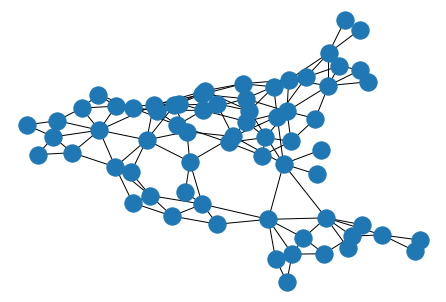

68


In [0]:
nx.draw(C)
plt.show()
print(C.number_of_nodes())

,ObservationDate,Confirmed,Deaths,Recovered,Location
0,2020-04-30,118.0,0.0,0.0,New Brunswick:Canada
1,2020-05-01,118.0,0.0,0.0,New Brunswick:Canada
2,2020-05-02,NaN,NaN,NaN,NaN
3,2020-05-03,NaN,NaN,NaN,NaN
4,2020-05-04,NaN,NaN,NaN,NaN
5,2020-05-05,NaN,NaN,NaN,NaN
6,2020-05-06,NaN,NaN,NaN,NaN
7,2020-05-07,NaN,NaN,NaN,NaN
8,2020-05-08,NaN,NaN,NaN,NaN
9,2020-05-09,NaN,NaN,NaN,NaN


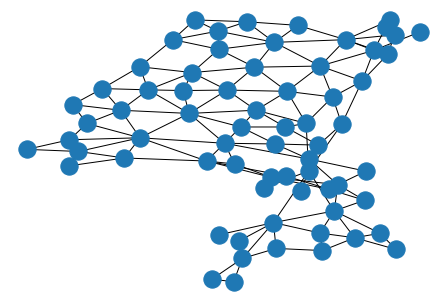

In [0]:
# C from above cells is full_graph
def create_lagged_graph(full_graph, start_date, lag=None, end_date=None):
  if lag is None and end_date is None:
    print("Error: Specify a lag or an end-date")
    return None

  if end_date==None:
    end_date = start_date + dt.timedelta(days=lag)

  # copy node/edge structure without data
  lagged_graph=nx.Graph()
  lagged_graph.add_edges_from(full_graph.edges)
  # add in the lagged data portions 
  for location in full_graph:
    full_data = full_graph.nodes[location]["Data"]
    new_data = pd.DataFrame({"ObservationDate": pd.date_range(start=start_date, end=end_date, closed="left") })

    new_data = new_data.merge( full_data, on="ObservationDate", how="left").reset_index(drop=True)
    lagged_graph.nodes[location]["Data"] = new_data

  return lagged_graph

lag=10
example_lag = create_lagged_graph(C, start_date = dt.datetime.strptime("2020-04-30", "%Y-%m-%d"), lag=lag)
nx.draw(example_lag)
display(example_lag.nodes["New Brunswick:Canada"]["Data"])

# check that each node's data table fills in rows for missing dates
for location in example_lag:
  assert (len( example_lag.nodes[location]["Data"].index) == lag)
